# Importa as bibliotecas

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import investpy as inv

from scipy import stats

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# FUNÇÕES

In [2]:
def features(systematic_risk, stock, start_date, end_date):

    beta = []
    mean = []
    std = []
    max = []
    min = []
    volume = []
    volume_last_day = []
    tickers = []

    sr = yf.download(systematic_risk, start_date, end_date, auto_adjust=False)
    sr['return'] = sr['Adj Close'].pct_change(1)
    std_sr = sr['return'].std()

    for s in stock:
            st = yf.download(s, start_date, end_date, auto_adjust=False)
            if len(st) == 0:
                  pass
            else:
                st['return'] = st['Adj Close'].pct_change(1)
                std_st = st['return'].std()
                mean_st = st['return'].mean()
                max_st = st['return'].max()
                min_st = st['return'].min()
                
                last_year=st.copy()
                last_year.reset_index(inplace=True)
                last_year = last_year.loc[last_year['Date'].dt.strftime('%Y') == end_date[0:4]]

                last_day=last_year.iloc[-1:,:]

                volume_st = last_year['Volume'].mean().values[0]
                volume_st_last_day =  last_day['Volume'].values[0][0]

                tickers.append(s)
                mean.append(mean_st)
                max.append(max_st)
                min.append(min_st)
                std.append(std_st)
                volume.append(volume_st)
                volume_last_day.append(volume_st_last_day)
                
                beta.append(st['return'].corr(sr['return']) * std_st/std_sr)
                
    d = {}
    d['beta'] = beta
    d['return_std'] = std
    d['return_mean'] = mean
    d['return_max'] = max
    d['return_min'] = min
    d['volume_mean_year'] = volume
    d['volume_last_day'] = volume_last_day

    df = pd.DataFrame(data=d, index=tickers)
    df.dropna(inplace=True)

    return df


In [3]:
data = inv.stocks.get_stocks(country='Brazil')
ticker = data['symbol'].to_list()
ticker_list = []

for e,i in enumerate(ticker): 
    if '11' not in i and '12' not in i and '13' not in i and '35' not in i and '34' not in i and '33' not in i and i not in ('LOGG3','OSXB3'):
        if e == 0:
            ticker_list.append(i)
        elif any(i[0:4] in s for s in ticker_list):
            pass
        else:
            ticker_list.append(i)

ticker_list = [i + ".SA" for i in ticker_list]

print(ticker_list)

['ABCB4.SA', 'AGRO3.SA', 'RAIL3.SA', 'ALPA3.SA', 'ALSO3.SA', 'AMAR3.SA', 'ABEV3.SA', 'ADHM3.SA', 'ARZZ3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBRK3.SA', 'BEEF3.SA', 'BPHA3.SA', 'BPAN4.SA', 'BRAP3.SA', 'BRFS3.SA', 'APER3.SA', 'BRKM3.SA', 'BRML3.SA', 'BRPR3.SA', 'BRSR6.SA', 'OIBR3.SA', 'BTOW3.SA', 'B3SA3.SA', 'CAMB4.SA', 'CARD3.SA', 'CCPR3.SA', 'CCRO3.SA', 'CEDO4.SA', 'CEED3.SA', 'CESP6.SA', 'CGAS5.SA', 'CGRA4.SA', 'CIEL3.SA', 'CMIG3.SA', 'COCE5.SA', 'CPFE3.SA', 'CPLE3.SA', 'CRDE3.SA', 'CSAN3.SA', 'CSMG3.SA', 'CSNA3.SA', 'LIQO3.SA', 'CTNM4.SA', 'CYRE3.SA', 'DASA3.SA', 'DIRR3.SA', 'DTEX3.SA', 'ECOR3.SA', 'EEEL3.SA', 'ELEK4.SA', 'ELET3.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENGI4.SA', 'EQTL3.SA', 'YDUQ3.SA', 'ETER3.SA', 'EUCA4.SA', 'EVEN3.SA', 'EZTC3.SA', 'FESA4.SA', 'FHER3.SA', 'TASA4.SA', 'FLRY3.SA', 'FRIO3.SA', 'TIET3.SA', 'GFSA3.SA', 'GGBR3.SA', 'GOAU3.SA', 'GOLL4.SA', 'GRND3.SA', 'GSHP3.SA', 'HBOR3.SA', 'HGTX3.SA', 'PRIO3.SA', 'HYPE3.SA', 'IDNT3.SA', 'IDVL4.SA', 'IGTA3.SA', 'MEAL3.SA', 'INEP3.SA', 'IT

# Aquisição dos dados

# Cálculo dos df

In [4]:
df_init = features("^BVSP", ticker_list, "2015-01-01", "2020-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ALSO3.SA']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ARZZ3.SA']: YFTzMissingError('possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 

In [5]:
df_fund = pd.read_csv('indices_fundamentalistas.csv')

df_fund['D.Y'] = df_fund['D.Y'].str.replace('%','') 
df_fund['D.Y'] = df_fund['D.Y'].str.replace(',','.').astype(float)/100 

df_fund['ROE'] = df_fund['ROE'].str.replace('%','') 
df_fund['ROE'] = df_fund['ROE'].str.replace(',','.').astype(float)/100 

df_fund['P/L'] = df_fund['P/L'].str.replace(',','.').astype(float)/100 
df_fund['P/VP'] = df_fund['P/VP'].str.replace(',','.').astype(float)/100 
df_fund['LPA'] = df_fund['LPA'].str.replace(',','.').astype(float)/100 

df_fund.drop(columns='dt_mes', inplace=True)

df_fund['P/L'].replace(0, np.nan, inplace=True)
df_fund['P/VP'].replace(0, np.nan, inplace=True)
df_fund['LPA'].replace(0, np.nan, inplace=True)
df_fund['ROE'].replace(0, np.nan, inplace=True)

df_fund.dropna(inplace=True)

df_fund = df_fund.groupby('ticker').mean().copy()

df_fund.head()

,D.Y,P/L,P/VP,LPA,ROE
ticker,,,,,
AALR3.SA,0.0032,0.8525,0.0137,-0.0002,-0.0030
ABCB4.SA,0.0674,0.0745,0.0087,0.0213,0.1194
ABEV3.SA,0.0322,0.2628,0.0521,0.0070,0.2061
ADHM3.SA,0.0000,-0.0308,-0.0124,-0.0058,-0.4112
AFLT3.SA,0.0793,0.2296,0.0357,0.0030,0.1598


In [6]:
df = df_fund.merge(df_init, how='inner', left_index=True, right_index=True)
df.dropna(inplace = True)

df['annual_mean_return'] = (1+df['return_mean'])**252-1
df['annual_std_return'] = df['return_std']*(252**(1/2))

df[['D.Y', 'P/L', 'LPA', 'ROE','P/VP', 'annual_mean_return', 'return_max', 'return_min', 'annual_std_return','beta']].describe()

,D.Y,P/L,LPA,ROE,P/VP,annual_mean_return,return_max,return_min,annual_std_return,beta
count,213.0000,213.0000,213.0000,213.0000,213.0000,213.0000,213.0000,213.0000,213.0000,213.0000
mean,0.0291,0.1172,-0.0082,-0.1512,0.0171,0.3701,0.4069,-0.2347,0.5687,0.6312
std,0.0318,0.3766,0.1038,1.0754,0.0590,0.3276,0.4447,0.0958,0.2594,0.3759
min,0.0000,-2.0853,-0.7186,-12.1759,-0.4544,-0.4331,0.0644,-0.6577,0.1538,-0.0628
25%,0.0015,-0.0035,-0.0040,-0.0818,0.0063,0.1705,0.1713,-0.2878,0.4026,0.3575
50%,0.0226,0.1043,0.0065,0.0733,0.0118,0.3095,0.2500,-0.2156,0.5000,0.6069
75%,0.0436,0.2150,0.0181,0.1405,0.0237,0.4886,0.4717,-0.1739,0.6353,0.9283
max,0.2104,2.4626,0.2764,2.7051,0.3228,1.7501,3.8421,-0.0557,1.7140,1.7727


In [7]:
print(pd.cut(df['annual_mean_return'],np.arange (-0.31,1.76,0.15)).value_counts())

annual_mean_return
(0.14, 0.29]      59
(0.29, 0.44]      52
(0.44, 0.59]      28
(-0.01, 0.14]     22
(-0.16, -0.01]    14
(0.59, 0.74]      14
(0.74, 0.89]       7
(0.89, 1.04]       5
(1.19, 1.34]       3
(1.04, 1.19]       2
(1.49, 1.64]       2
(-0.31, -0.16]     1
(1.34, 1.49]       1
Name: count, dtype: int64


In [8]:
print(pd.cut(df['ROE'],np.arange (df['ROE'].min(),df['ROE'].max(),0.20)).value_counts().head(20))

ROE
(0.0241, 0.224]     112
(-0.176, 0.0241]     43
(0.224, 0.424]       13
(-0.376, -0.176]     12
(-0.576, -0.376]      8
(-0.976, -0.776]      4
(-0.776, -0.576]      4
(-1.576, -1.376]      3
(-2.976, -2.776]      2
(-4.376, -4.176]      1
(-3.376, -3.176]      1
(-3.176, -2.976]      1
(-2.576, -2.376]      1
(-2.376, -2.176]      1
(-1.976, -1.776]      1
(-1.376, -1.176]      1
(2.424, 2.624]        1
(0.624, 0.824]        1
(0.824, 1.024]        1
(0.424, 0.624]        0
Name: count, dtype: int64


In [9]:
print(pd.cut(df['P/L'],np.arange (df['P/L'].min(),df['P/L'].max(),0.20)).value_counts().head(20))

P/L
(-0.0853, 0.115]     102
(0.115, 0.315]        62
(0.315, 0.515]        13
(-0.285, -0.0853]     10
(0.515, 0.715]         7
(-0.685, -0.485]       3
(-0.485, -0.285]       3
(0.715, 0.915]         3
(-1.285, -1.085]       2
(-0.885, -0.685]       2
(0.915, 1.115]         2
(1.115, 1.315]         1
(1.715, 1.915]         1
(1.915, 2.115]         0
(1.515, 1.715]         0
(1.315, 1.515]         0
(-2.085, -1.885]       0
(-1.885, -1.685]       0
(-1.085, -0.885]       0
(-1.485, -1.285]       0
Name: count, dtype: int64


In [10]:
print(pd.cut(df['LPA'],np.arange (df['LPA'].min(),df['LPA'].max(),0.1)).value_counts().head(20))

LPA
(-0.0186, 0.0814]    173
(-0.119, -0.0186]     19
(0.0814, 0.181]        8
(-0.219, -0.119]       5
(-0.619, -0.519]       2
(-0.519, -0.419]       2
(-0.419, -0.319]       1
(-0.319, -0.219]       1
(-0.719, -0.619]       0
Name: count, dtype: int64


In [11]:
df = df[(df['annual_mean_return'] <= 0.74) & (df['annual_mean_return'] >= -0.17)]
df = df[(df['ROE'] <= 0.23) & (df['ROE'] >= -0.18)]
df = df[(df['P/L'] <= 0.32) & (df['P/L'] >= -0.09)]
df = df[(df['LPA'] <= 0.18) & (df['LPA'] >= -0.12)]
df = df[df['volume_last_day'] != 0]

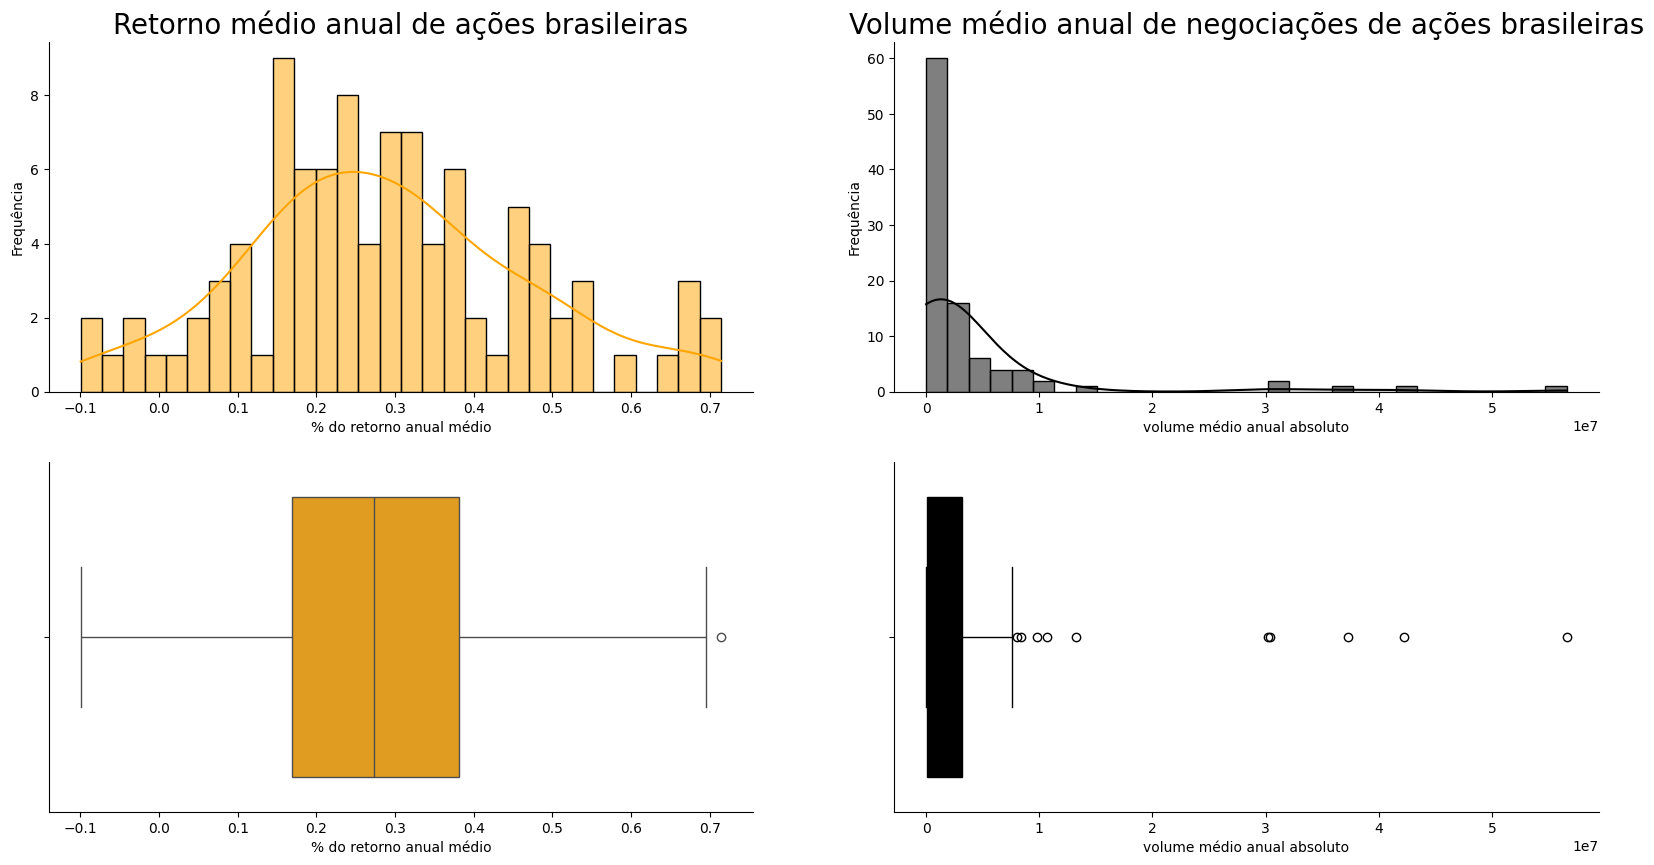

In [12]:
fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

sns.histplot(data=df, x='annual_mean_return', ax=ax1, bins=30, color='Orange', kde=True)
sns.histplot(data=df, x='volume_mean_year', ax=ax2, bins=30, color='Black', kde=True)

sns.boxplot(data=df, x='annual_mean_return', ax=ax3, color='Orange', orient='v')
sns.boxplot(data=df, x='volume_mean_year', ax=ax4, color='Black', orient='v')

ax1.set_title('Retorno médio anual de ações brasileiras', fontsize = 20)
ax2.set_title('Volume médio anual de negociações de ações brasileiras', fontsize = 20)

ax1.set_xlabel('% do retorno anual médio')
ax2.set_xlabel('volume médio anual absoluto')
ax3.set_xlabel('% do retorno anual médio')
ax4.set_xlabel('volume médio anual absoluto')

ax1.set_ylabel('Frequência')
ax2.set_ylabel('Frequência')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

plt.show()

In [13]:
df = df[['D.Y', 'P/L', 'LPA', 'ROE','P/VP', 'annual_mean_return', 'return_max', 'return_min', 'annual_std_return','beta']].copy()

df.describe()

,D.Y,P/L,LPA,ROE,P/VP,annual_mean_return,return_max,return_min,annual_std_return,beta
count,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000
mean,0.0335,0.1235,0.0148,0.0816,0.0149,0.2874,0.2558,-0.1954,0.4626,0.6904
std,0.0236,0.0852,0.0212,0.0858,0.0107,0.1803,0.2022,0.0700,0.1395,0.3344
min,0.0000,-0.0776,-0.0304,-0.1586,-0.0110,-0.0997,0.0644,-0.3865,0.1538,0.0059
25%,0.0163,0.0760,0.0043,0.0355,0.0084,0.1690,0.1503,-0.2273,0.3689,0.4551
50%,0.0318,0.1126,0.0120,0.1015,0.0123,0.2736,0.1930,-0.1903,0.4483,0.6712
75%,0.0483,0.1875,0.0213,0.1431,0.0193,0.3819,0.3071,-0.1505,0.5451,0.9532
max,0.1236,0.3105,0.1094,0.2273,0.0521,0.7146,1.4236,-0.0557,1.1594,1.4201


In [14]:
df.shape

(98, 10)

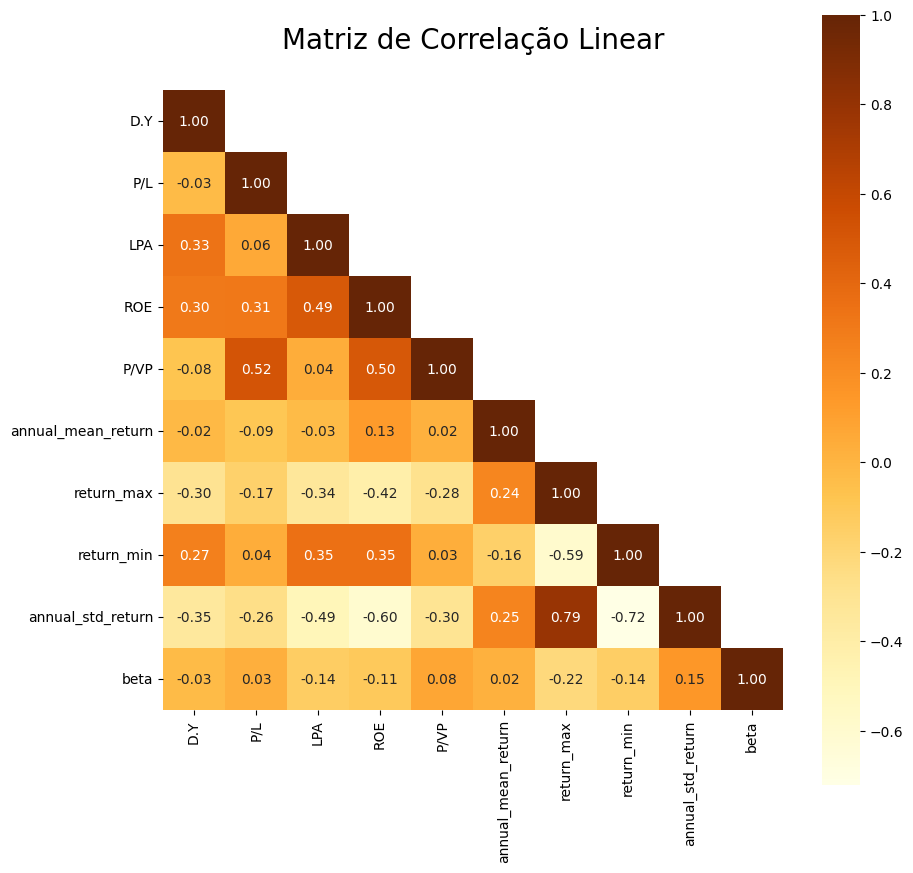

In [15]:
fig, ax = plt.subplots(figsize = (10,10))

corr_df = df.corr()

lower_triang_df = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))

sns.heatmap(lower_triang_df, fmt='.2f', square=True, linecolor='white', vmax=1.0, annot=True, ax=ax, cmap="YlOrBr");
ax.set_title("Matriz de Correlação Linear", fontsize=20, pad=30.0)

plt.plot();

In [16]:
scaler = MinMaxScaler()
scaler.fit(df)
df_scaler = scaler.transform(df)

df_scaler = pd.DataFrame(df_scaler, columns=df.columns, index=df.index)

df_scaler.head()

,D.Y,P/L,LPA,ROE,P/VP,annual_mean_return,return_max,return_min,annual_std_return,beta
ABCB4.SA,0.5453,0.3918,0.3702,0.7203,0.3125,0.4095,0.1178,0.7160,0.2045,0.5756
ABEV3.SA,0.2602,0.8772,0.2679,0.9450,1.0000,0.2168,0.0253,0.6914,0.1219,0.4239
AGRO3.SA,0.3209,0.4460,0.4031,0.8682,0.3505,0.4969,0.0257,0.8432,0.0984,0.1963
ALUP3.SA,0.2052,0.5834,0.2658,0.7341,0.4450,0.4825,0.3171,0.5450,0.3232,0.2145
B3SA3.SA,0.1865,0.8674,0.3009,0.6740,0.5824,0.7699,0.0942,0.6812,0.2255,0.7502


In [17]:
df_scaler.corr()

,D.Y,P/L,LPA,ROE,P/VP,annual_mean_return,return_max,return_min,annual_std_return,beta
D.Y,1.0000,-0.0322,0.3350,0.3042,-0.0783,-0.0191,-0.2965,0.2730,-0.3471,-0.0312
P/L,-0.0322,1.0000,0.0648,0.3120,0.5184,-0.0940,-0.1655,0.0428,-0.2611,0.0295
LPA,0.3350,0.0648,1.0000,0.4900,0.0433,-0.0292,-0.3359,0.3482,-0.4919,-0.1432
ROE,0.3042,0.3120,0.4900,1.0000,0.4958,0.1281,-0.4186,0.3507,-0.6022,-0.1149
P/VP,-0.0783,0.5184,0.0433,0.4958,1.0000,0.0198,-0.2824,0.0322,-0.3028,0.0779
annual_mean_return,-0.0191,-0.0940,-0.0292,0.1281,0.0198,1.0000,0.2377,-0.1606,0.2502,0.0237
return_max,-0.2965,-0.1655,-0.3359,-0.4186,-0.2824,0.2377,1.0000,-0.5905,0.7882,-0.2214
return_min,0.2730,0.0428,0.3482,0.3507,0.0322,-0.1606,-0.5905,1.0000,-0.7218,-0.1448
annual_std_return,-0.3471,-0.2611,-0.4919,-0.6022,-0.3028,0.2502,0.7882,-0.7218,1.0000,0.1492
beta,-0.0312,0.0295,-0.1432,-0.1149,0.0779,0.0237,-0.2214,-0.1448,0.1492,1.0000


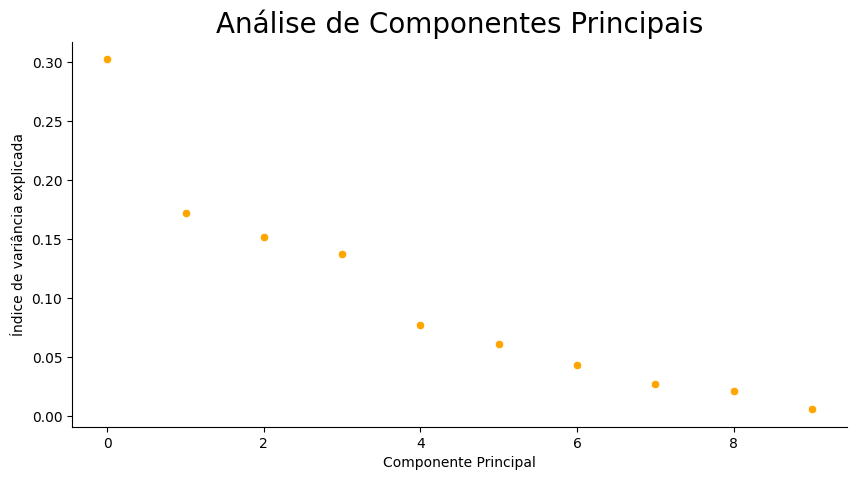

In [18]:

pca=PCA(svd_solver='full', n_components = df_scaler.shape[1])
pca_fit = pca.fit(df_scaler)
df_pca = pca_fit.transform(df_scaler)



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.scatterplot(pca_fit.explained_variance_ratio_, ax=ax, color='Orange', markers='+')

ax.set_title('Análise de Componentes Principais', fontsize = 20)

ax.set_ylabel('Índice de variância explicada')

ax.set_xlabel('Componente Principal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

In [19]:
df_pca.shape

(98, 10)

In [20]:
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])], index=df.index)

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ABCB4.SA,0.1768,-0.1680,-0.1493,0.2089,0.1367,0.0123,-0.0346,0.0782,0.0293,-0.0583
ABEV3.SA,0.5832,0.3666,-0.0003,-0.3607,-0.0216,-0.1499,-0.2619,-0.0516,0.1188,-0.0249
AGRO3.SA,0.3880,-0.3083,0.1312,0.0074,-0.1180,-0.0254,-0.0066,0.0569,-0.0847,-0.0278
ALUP3.SA,0.0080,-0.0605,0.2594,-0.2064,0.0077,-0.0339,-0.0317,0.1078,0.0407,-0.0377
B3SA3.SA,0.1690,0.4476,0.0743,0.1203,-0.1727,0.2328,0.0331,-0.0282,0.0215,-0.0568


In [21]:
df_pca.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
PC1,1.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
PC2,-0.0000,1.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000
PC3,0.0000,-0.0000,1.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000
PC4,-0.0000,0.0000,0.0000,1.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000
PC5,0.0000,0.0000,-0.0000,-0.0000,1.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000
PC6,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,1.0000,-0.0000,0.0000,-0.0000,-0.0000
PC7,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,1.0000,-0.0000,-0.0000,-0.0000
PC8,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,1.0000,0.0000,-0.0000
PC9,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,1.0000,-0.0000
PC10,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,1.0000


# Data viz

  File "c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


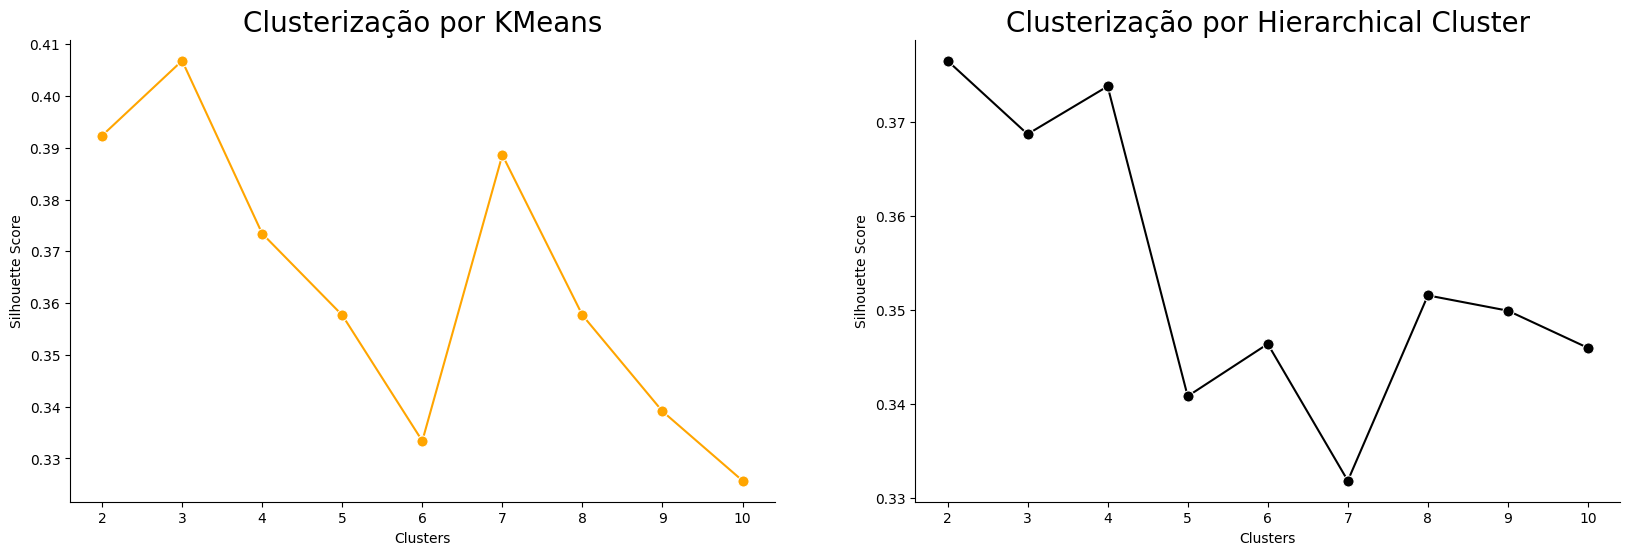

In [22]:
# Vamos usar o método da silhueta para determinar o número de clusters, mas aqui no aglomerative clustering

X = df_pca[['PC1','PC2']]

clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores_AC = []
scores_KM = []

for n in clusters:
    ac = AgglomerativeClustering(n_clusters = n)
    ac.fit(X)
    labels = ac.labels_
    df[f"cluster_kn_{n}"] = labels
    scores_AC.append(silhouette_score(X, labels))

for n in clusters:
    kn = KMeans(n_clusters = n)
    kn.fit(X)
    labels = kn.labels_
    df[f"cluster_ac_{n}"] = labels
    scores_KM.append(silhouette_score(X, labels))


fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))


sns.lineplot(x=clusters, y=scores_KM, ax=ax1, color='Orange', marker = 'o', markersize=8)
sns.lineplot(x=clusters, y=scores_AC, ax=ax2, color='Black', marker = 'o', markersize=8)

ax1.set_title('Clusterização por KMeans', fontsize = 20)
ax2.set_title('Clusterização por Hierarchical Cluster', fontsize = 20)

ax1.set_ylabel('Silhouette Score')
ax2.set_ylabel('Silhouette Score')

ax1.set_xlabel('Clusters')
ax2.set_xlabel('Clusters')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show();


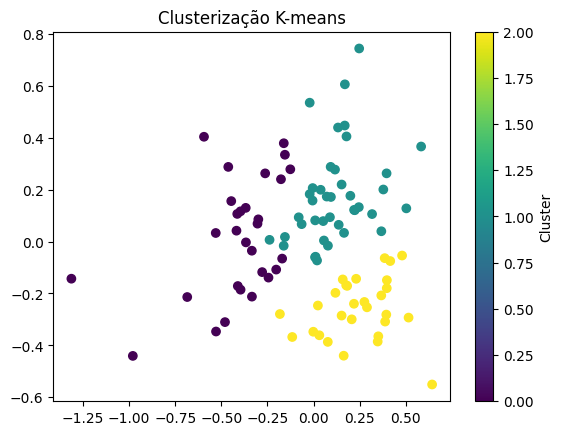

In [23]:
optimal_n_clusters = 'cluster_kn_3'

scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df[optimal_n_clusters], cmap='viridis')
plt.colorbar(scatter, label='Cluster')
plt.title('Clusterização K-means')
plt.show()


In [24]:
df.groupby(optimal_n_clusters)[optimal_n_clusters].count().to_frame().rename(columns={'cluster_kn_3':'stocks'})

,stocks
cluster_kn_3,
0,29
1,40
2,29


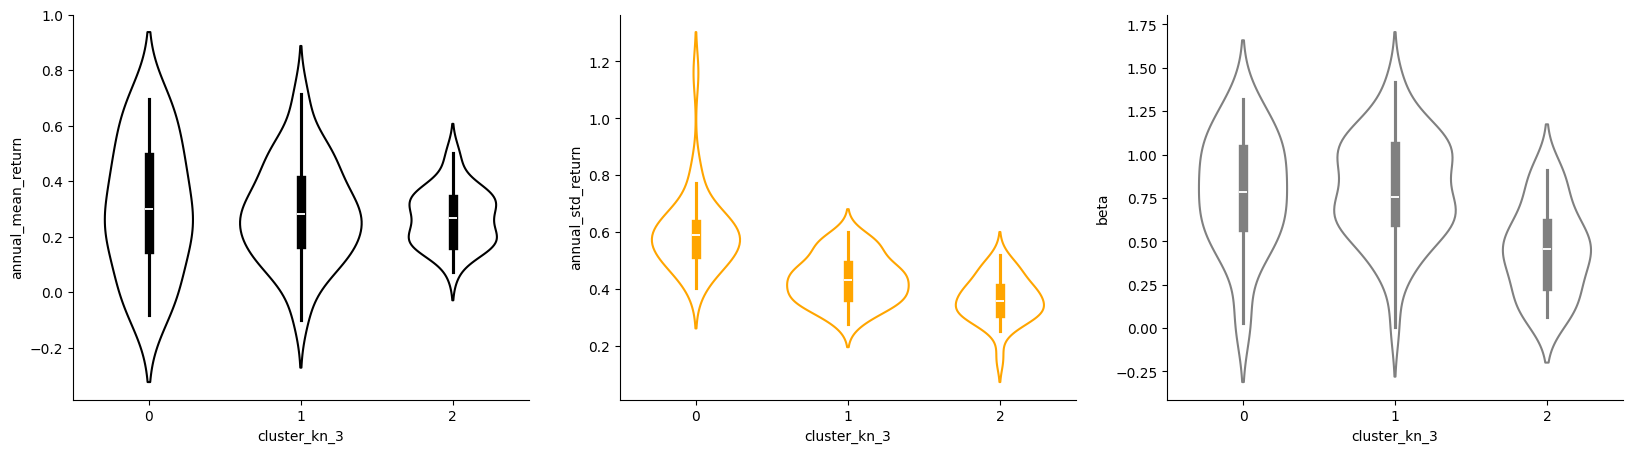

In [25]:
fig, [ax1, ax2,ax3] = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.violinplot(x=optimal_n_clusters, y='annual_mean_return', ax=ax1, data=df, scale='count', fill=False,color='Black')
sns.violinplot(x=optimal_n_clusters, y='annual_std_return', ax=ax2, data=df, scale='count', fill=False,color='Orange')
sns.violinplot(x=optimal_n_clusters, y='beta', ax=ax3, data=df, scale='count', fill=False, color='Gray')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

plt.show()

In [26]:
t_stat, p_val = stats.ttest_ind(df.query(f'{optimal_n_clusters} == 2')['beta'], df.query(f'{optimal_n_clusters} == 1')['beta'])

# Exibindo os resultados
print(f"Estatística t: {t_stat}")
print(f"Valor p: {p_val}")

# Interpretação
alpha = 0.05
if p_val < alpha:
    print("Há uma diferença significativa entre as médias (rejeitamos H0).")
else:
    print("Não há uma diferença significativa entre as médias (não rejeitamos H0).")

Estatística t: -5.171699570796557
Valor p: 2.2806966402107855e-06
Há uma diferença significativa entre as médias (rejeitamos H0).


In [27]:
def retorno_ativos(portfolio, start_date, end_date):

    df_retornos = yf.download(portfolio, start = start_date, end = end_date, auto_adjust=False)["Adj Close"]

    df_retornos = df_retornos.reset_index()

    for stock in portfolio:

        df_retornos[stock] = df_retornos[stock].pct_change(1)

    df_retornos.dropna(inplace=True)
    df_retornos.set_index('Date', inplace=True)

    return df_retornos

def risco_portfolio(df_retornos, pesos):

    # Calcular a matriz de covariância entre os ativos
    covariancia = np.cov(df_retornos, rowvar=False)
    
    # Calcular o risco do portfólio usando a fórmula do desvio padrão
    risco = np.sqrt(np.dot(pesos.T, np.dot(covariancia, pesos)))

    risco = risco*(252**(1/2))
    
    return risco

def retorno_portfolio(df_retornos, pesos):

    retorno = np.dot(df_retornos.mean(), pesos)

    retorno = (1+retorno)**252-1
    
    return retorno

In [28]:
start_date = '2015-01-01'
end_date = '2020-12-31'

retorno = []
risco = []

clusters = sorted(list(df[optimal_n_clusters].unique()))

for c in clusters:
    portfolio = df[df[optimal_n_clusters] == c].index.tolist()

    pesos = np.array([1/len(portfolio) for i in range(len(portfolio))])

    df_retornos = retorno_ativos(portfolio, start_date, end_date)

    retorno.append(retorno_portfolio(df_retornos, pesos))

    risco.append(risco_portfolio(df_retornos, pesos))

d = {}
d['clusters'] = clusters 
d['expected_annual_return'] = retorno
d['expected_annual_volatility'] = risco 
  


[*********************100%***********************]  29 of 29 completed
[*********************100%***********************]  40 of 40 completed
[*********************100%***********************]  29 of 29 completed


In [29]:
df_analyse = pd.DataFrame(d)

df_analyse['return_x_volatility'] = df_analyse['expected_annual_return']/df_analyse['expected_annual_volatility']

df_analyse

,clusters,expected_annual_return,expected_annual_volatility,return_x_volatility
0,0,0.3436,0.2940,1.1687
1,1,0.5063,0.2028,2.4964
2,2,0.2695,0.1647,1.6357


# Cálculo da performance

In [30]:
def performance(stocks, start_date, end_date):

    df = yf.download(stocks, start = start_date, end = end_date, auto_adjust=False)["Adj Close"]

    df = df.reset_index()

    df.dropna(inplace=True)

    df = df[df['Date'].dt.strftime("%m").isin(["01","12"])]
    df = df.groupby(df['Date'].dt.strftime("%Y")).apply(lambda x: x.iloc[[0, -1]]).reset_index(drop=True)
    df[stocks] = df[stocks].pct_change(1)
    df['Return'] = df.iloc[:,1:].mean(axis=1)
    df = df[df['Date'].dt.strftime("%m").isin(["12"])]
    df.set_index('Date', inplace=True)

    return df


In [31]:
start_date = '2021-01-01'
end_date = '2024-12-31'

clusters = sorted(list(df[optimal_n_clusters].unique()))

for c in clusters:
    globals()['stocks_%s' % c] = df[df[optimal_n_clusters] == c].index.tolist()

for c in clusters:
    rt = performance(globals()['stocks_%s' % c] ,start_date,end_date)
    if c == 0:
        total_returns = rt[['Return']]
        total_returns.rename(columns={'Return':'return_cluster_0'}, inplace=True)
    else:
        total_returns[f'return_cluster_{c}'] = rt['Return']


market = performance('^BVSP',start_date,end_date)

total_returns['return_market'] = market['Return'].values

[*********************100%***********************]  29 of 29 completed
[*********************100%***********************]  40 of 40 completed
[*********************100%***********************]  29 of 29 completed
[*********************100%***********************]  1 of 1 completed


In [32]:
total_returns

Ticker,return_cluster_0,return_cluster_1,return_cluster_2,return_market
Date,,,,
2021-12-30,0.0045,-0.0498,0.0780,-0.1159
2022-12-29,-0.1827,0.0188,0.0864,0.0588
2023-12-28,0.4010,0.5039,0.3148,0.2614
2024-12-30,-0.0542,-0.1820,0.0199,-0.0936


In [33]:
total_returns.mean().to_frame().rename(columns={0:'annual_mean_return'})

,annual_mean_return
Ticker,
return_cluster_0,0.0421
return_cluster_1,0.0727
return_cluster_2,0.1248
return_market,0.0277


In [34]:
portfolio = stocks_2

rt = performance(portfolio, start_date,end_date)

[*********************100%***********************]  29 of 29 completed


In [35]:
start_date = '2015-01-01'
end_date = '2020-12-31'

for i,s in enumerate(portfolio):
    if i == 0:
        st = yf.download(s, start_date, end_date, auto_adjust=False)
        st['return'] = st['Adj Close'].pct_change(1)
        df_retornos = st['return'].copy()
        df_retornos.name = s
    else:
        st = yf.download(s, start_date, end_date, auto_adjust=False)
        st['return'] = st['Adj Close'].pct_change(1)
        serie = st['return'].copy()
        serie.name = s
        df_retornos = pd.merge(df_retornos, serie, how='left', on='Date')

df_retornos.dropna(inplace=True)

pesos_iniciais = np.array([1/len(portfolio) for i in range(len(portfolio))])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

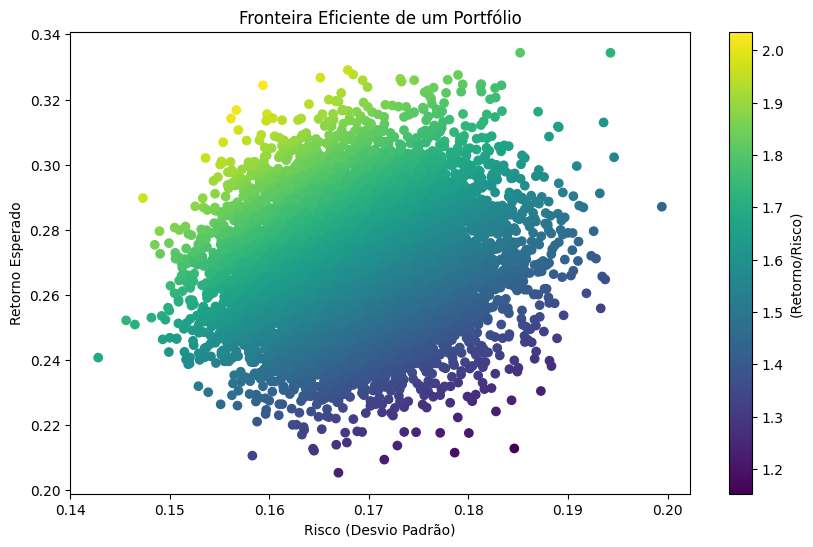

In [36]:
def calcular_fronteira_eficiente(retornos, pesos_iniciais, num_portfolios=10000):
    
    # Número de ativos
    n = retornos.shape[1]
    
    # Inicializar arrays para armazenar os resultados
    retornos_simulados = np.zeros(num_portfolios)
    riscos_simulados = np.zeros(num_portfolios)
    pesos_simulados = np.zeros((num_portfolios, n))

    # Calcular a média e a covariância dos retornos dos ativos
    media_retornos = retornos.mean()
    matriz_covariancia = retornos.cov()

    # Simulação de portfólios
    for i in range(num_portfolios):
        # Gerar pesos aleatórios para o portfólio
        pesos = np.random.random(n)
        pesos /= np.sum(pesos)  # Normalizar os pesos para que a soma seja 1

        # Calcular o retorno esperado e o risco (desvio padrão)
        retorno_portfolio = np.dot(pesos, media_retornos)
        risco_portfolio = np.sqrt(np.dot(pesos.T, np.dot(matriz_covariancia, pesos)))

        # Armazenar os resultados
        retornos_simulados[i] = (1+retorno_portfolio)**252-1
        riscos_simulados[i] = risco_portfolio*(252**(1/2))
        pesos_simulados[i, :] = pesos

    return retornos_simulados, riscos_simulados, pesos_simulados


# Calcular a fronteira eficiente
retornos_simulados, riscos_simulados, pesos_simulados = calcular_fronteira_eficiente(df_retornos, pesos_iniciais)

# Plotar a fronteira eficiente
plt.figure(figsize=(10, 6))
plt.scatter(riscos_simulados, retornos_simulados, c=retornos_simulados / riscos_simulados, cmap='viridis')
plt.colorbar(label='(Retorno/Risco)')
plt.xlabel('Risco (Desvio Padrão)')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de um Portfólio')
plt.show()

In [37]:
df_pesos = pd.DataFrame(pesos_simulados, columns=portfolio)
df_pesos['retornos_simulados'] = retornos_simulados
df_pesos['riscos_simulados'] = riscos_simulados
df_pesos['retornos_x_riscos'] = retornos_simulados/riscos_simulados

melhores_pesos = df_pesos.sort_values(by='retornos_x_riscos', ascending=False).iloc[1,:-3]

In [41]:
rt_otimizado = rt.copy()

rt_otimizado['optimized_annual_mean_return'] = [
np.dot(rt_otimizado.iloc[0:1,:-1],melhores_pesos)[0],
np.dot(rt_otimizado.iloc[1:2,:-1],melhores_pesos)[0],
np.dot(rt_otimizado.iloc[2:3,:-1],melhores_pesos)[0],
np.dot(rt_otimizado.iloc[3:4,:-1],melhores_pesos)[0]
]

In [42]:
rt_otimizado

Ticker,ABCB4.SA,AGRO3.SA,BEES3.SA,BGIP4.SA,BNBR3.SA,BRIV3.SA,CAML3.SA,CEEB3.SA,CGRA4.SA,COCE5.SA,...,ITUB3.SA,MTSA4.SA,PSSA3.SA,RPAD5.SA,SAPR4.SA,SLCE3.SA,TUPY3.SA,VIVT3.SA,Return,optimized_annual_mean_return
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.0520,0.2666,-0.0818,-0.0832,0.0147,-0.1744,0.0682,-0.1483,0.0817,0.0215,...,-0.2865,0.4053,-0.0693,-0.1248,-0.2017,0.6127,-0.0804,0.1509,0.0780,0.0672
2022-12-29,0.3394,0.2469,0.2692,-0.2971,0.1045,0.2927,-0.2356,0.4140,-0.2289,-0.1646,...,0.1618,0.1494,0.2271,-0.0468,0.0235,0.1911,0.3457,-0.1559,0.0864,0.1059
2023-12-28,0.4255,0.0269,0.9850,0.3253,0.5716,0.2260,0.1032,0.1436,0.0939,0.0096,...,0.4124,0.1432,0.3609,0.2636,0.7814,-0.0384,0.1552,0.5903,0.3148,0.2797
2024-12-30,-0.0872,-0.0938,-0.0542,0.1345,-0.0442,0.1952,-0.2326,0.0496,0.0719,-0.3952,...,-0.0280,-0.1418,0.3068,0.1869,0.0119,-0.0030,-0.1155,-0.0223,0.0199,0.0655


In [43]:
melhores_pesos.to_frame().rename(columns={2824:'weights'}).T

,ABCB4.SA,AGRO3.SA,BEES3.SA,BGIP4.SA,BNBR3.SA,BRIV3.SA,CAML3.SA,CEEB3.SA,CGRA4.SA,COCE5.SA,...,GRND3.SA,ITSA3.SA,ITUB3.SA,MTSA4.SA,PSSA3.SA,RPAD5.SA,SAPR4.SA,SLCE3.SA,TUPY3.SA,VIVT3.SA
9550,0.0006,0.0226,0.0111,0.0197,0.0617,0.0516,0.0088,0.0492,0.0342,0.0204,...,0.0329,0.0349,0.0058,0.0399,0.0303,0.0648,0.0137,0.0629,0.0266,0.0470


In [44]:
rt_otimizado.mean().to_frame().rename(columns={0:'expected_annual_return'}).T.rename(columns={'Return':'annual_mean_return'})[['annual_mean_return', 'optimized_annual_mean_return']]

Ticker,annual_mean_return,optimized_annual_mean_return
expected_annual_return,0.1248,0.1296
